In [1]:
import sys
sys.path.append('python/')

import time
startTime = time.time()

import numpy as np
import matplotlib.pyplot as plt 
import load_galaxies as lg

## Pick a galaxy

#### List of galaxies:
    
 - NGC 5533
 - NGC 5005
 - NGC 891
 - NGC 7814
    <br> and a few more...
    

In [2]:
galaxy = lg.NGC5533                  # Change this value to select which galaxy you want

## Import measured data and uncertainty band

In [3]:
# Measured data
measured_data = galaxy['measured_data']

# Separate the columns into arrays
m_radii = galaxy['m_radii']
m_velocities = galaxy['m_velocities']
m_r_errors = galaxy['m_r_errors']
m_v_errors = galaxy['m_v_errors']    # Errors in velocity

# Uncertainty band, splined
greyband_bottom = galaxy['n_band_btm']
greyband_top = galaxy['n_band_top']

## Plot measured data with errorbars

Define: radius between 0 and 25 with 100 values <br>
Plot: measured data, errorbars, uncertainty band <br>
Tips:
 - Plotting errorbars: plt.errorbar(x,y,yerr=[v_err0,v_err1], marker='o', markersize=8, ecolor='gray',color='gray', linestyle='none', linewidth=2)<br>
 - Plotting uncertainty band: plt.fill_between(x,bottom(x),top(x),color='#dddddd')

<ErrorbarContainer object of 3 artists>

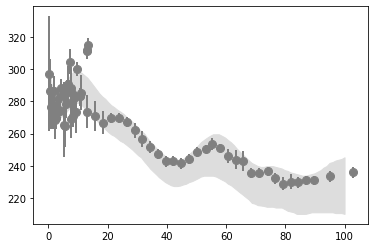

In [4]:
# testing
r = np.linspace(0,100,100)
plt.fill_between(r,greyband_bottom(r),greyband_top(r),color='#dddddd')
plt.errorbar(m_radii,m_velocities,yerr=[m_r_errors,m_v_errors], marker='o', markersize=8, \
             ecolor='gray',color='gray', linestyle='none', label='NGC 5533 (Noordermeer 2007)', linewidth=2)

## Import each component

In [5]:
# Bulge
bulge_r = galaxy['bulge']['r']
bulge_v = galaxy['bulge']['v']
# Disk
disk_r = galaxy['disk']['r']
disk_v = galaxy['disk']['v']
# Gas
gas_r = galaxy['gas']['r']
gas_v = galaxy['gas']['v']

## Calculate central black hole component

In [6]:
# Set Parameters

Mbh = 2.7e9                         # Mass of the central black hole in (solar mass)
G = 4.300e-6                        # Gravitational constant (kpc/solar mass*(km/s)^2)

# Equation for orbital velocity
def v_blackhole(r, G, Mbh):
    return np.sqrt((G*Mbh)/r)

print("Velocity at r=10[kpc]:",v_blackhole(10,G,Mbh))

Velocity at r=10[kpc]: 34.07345007480164


## Calculate dark matter halo component

>__Isothermal Density Profile__: <br>
    \begin{equation}
    \rho(r) = \rho_{0}\left[1+{\left(\frac{r}{r_c}\right)}^{2}\right]^{-1}
    \end{equation}
    <br>
>>where:<br>
    $\rho_{0}$ = central density<br>
    $r_c$ = core radius<br>
    
>__Mass__: <br>
    \begin{equation}
    M_{DM}(r) = \int_{0}^{r} 4\pi\rho(R)R^{2}dR
    \end{equation}<br>
>>where:<br>
        $M_{DM}$ = mass of the dark halo<br>
    <br>
    
>__Velocity__: <br>
    \begin{equation}
    v_{DM}^{2}(r) = \frac{GM_{DM}(r)}{r}
    \end{equation}<br>
    \begin{equation}
    v_{DM}(r) = \sqrt{4 \pi G \rho_{0} r_c^2 \big( 1- \frac{r_c}{r} \arctan{\frac{r}{r_c}}\big)}
    \end{equation}<br>

In [7]:
# Set parameters

#rho0 = galaxy['rho0']   # need to define these values for each galaxy
#r_c = galaxy['r_c']

rho0 = 0.31e9
r_c = 1.4

# Equation for dark halo velocity


## Calculate total velocity 

>__Total velocity__: <br>
    \begin{equation}
    v_{total}(r) = \sqrt{v_{bulge}^2 + v_{disk}^2 + v_{gas}^2 + v_{blackhole}^2 + v_{halo}^2}
    \end{equation}<br>

In [8]:
# Equation for total velocity


## Fitting

In [9]:
# Express weight

# Define function for total velocity with prefactors


In [10]:
# Fitting parameters

# Do fit


In [11]:
# Define parameters for plotting


## Plot result

## Calculate the total mass of the dark matter 

In [12]:
# Equation for isothermal density

# Equation for mass as a function of radius

# Total mass


# References <br>
>Casertano, Stefano. __"Rotation curve of the edge-on spiral galaxy NGC 5907: disc and halo masses."__ _Monthly Notices of the Royal Astronomical Society_ 203, no. 3 (1983): 735-747.<br><br>
>Jimenez, Raul, Licia Verde, and S. Peng Oh. __"Dark halo properties from rotation curves."__ _Monthly Notices of the Royal Astronomical Society_ 339, no. 1 (2003): 243-259.<br><br>
>Karukes, E. V., P. Salucci, and Gianfranco Gentile. __"The dark matter distribution in the spiral NGC 3198 out to 0.22 $R_{vir}$."__ _Astronomy & Astrophysics_ 578 (2015): A13.<br><br>
>Noordermeer, Edo. __"The rotation curves of flattened Sérsic bulges."__ _Monthly Notices of the Royal Astronomical Society_ 385, no. 3 (2007): 1359-1364.
***